In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: >

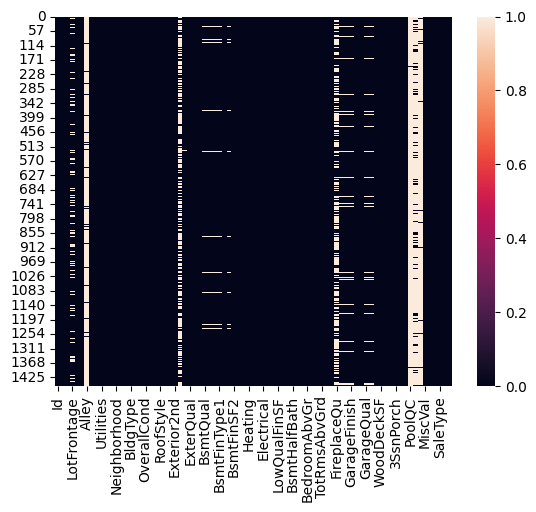

In [3]:
sns.heatmap(df_train.isnull())

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.drop(['Alley','Id','GarageYrBlt','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [7]:
for nv in df_train:
    print(nv,':',df_train[nv].isnull().sum(),df_train[nv].dtype)

MSSubClass : 0 int64
MSZoning : 0 object
LotFrontage : 259 float64
LotArea : 0 int64
Street : 0 object
LotShape : 0 object
LandContour : 0 object
Utilities : 0 object
LotConfig : 0 object
LandSlope : 0 object
Neighborhood : 0 object
Condition1 : 0 object
Condition2 : 0 object
BldgType : 0 object
HouseStyle : 0 object
OverallQual : 0 int64
OverallCond : 0 int64
YearBuilt : 0 int64
YearRemodAdd : 0 int64
RoofStyle : 0 object
RoofMatl : 0 object
Exterior1st : 0 object
Exterior2nd : 0 object
MasVnrType : 872 object
MasVnrArea : 8 float64
ExterQual : 0 object
ExterCond : 0 object
Foundation : 0 object
BsmtQual : 37 object
BsmtCond : 37 object
BsmtExposure : 38 object
BsmtFinType1 : 37 object
BsmtFinSF1 : 0 int64
BsmtFinType2 : 38 object
BsmtFinSF2 : 0 int64
BsmtUnfSF : 0 int64
TotalBsmtSF : 0 int64
Heating : 0 object
HeatingQC : 0 object
CentralAir : 0 object
Electrical : 1 object
1stFlrSF : 0 int64
2ndFlrSF : 0 int64
LowQualFinSF : 0 int64
GrLivArea : 0 int64
BsmtFullBath : 0 int64
BsmtHal

In [8]:
float_cols = df_train.select_dtypes(float).columns
for fc in float_cols:
    df_train[fc] = df_train[fc].fillna(df_train[fc].mean())

In [9]:
obj_cols = df_train.select_dtypes(object).columns
for objc in obj_cols:
    df_train[objc] = df_train[objc].fillna(df_train[objc].mode()[0])

In [10]:

for nv in df_train:
    print(nv,':',df_train[nv].isnull().sum(),df_train[nv].dtype)

MSSubClass : 0 int64
MSZoning : 0 object
LotFrontage : 0 float64
LotArea : 0 int64
Street : 0 object
LotShape : 0 object
LandContour : 0 object
Utilities : 0 object
LotConfig : 0 object
LandSlope : 0 object
Neighborhood : 0 object
Condition1 : 0 object
Condition2 : 0 object
BldgType : 0 object
HouseStyle : 0 object
OverallQual : 0 int64
OverallCond : 0 int64
YearBuilt : 0 int64
YearRemodAdd : 0 int64
RoofStyle : 0 object
RoofMatl : 0 object
Exterior1st : 0 object
Exterior2nd : 0 object
MasVnrType : 0 object
MasVnrArea : 0 float64
ExterQual : 0 object
ExterCond : 0 object
Foundation : 0 object
BsmtQual : 0 object
BsmtCond : 0 object
BsmtExposure : 0 object
BsmtFinType1 : 0 object
BsmtFinSF1 : 0 int64
BsmtFinType2 : 0 object
BsmtFinSF2 : 0 int64
BsmtUnfSF : 0 int64
TotalBsmtSF : 0 int64
Heating : 0 object
HeatingQC : 0 object
CentralAir : 0 object
Electrical : 0 object
1stFlrSF : 0 int64
2ndFlrSF : 0 int64
LowQualFinSF : 0 int64
GrLivArea : 0 int64
BsmtFullBath : 0 int64
BsmtHalfBath : 0

<Axes: >

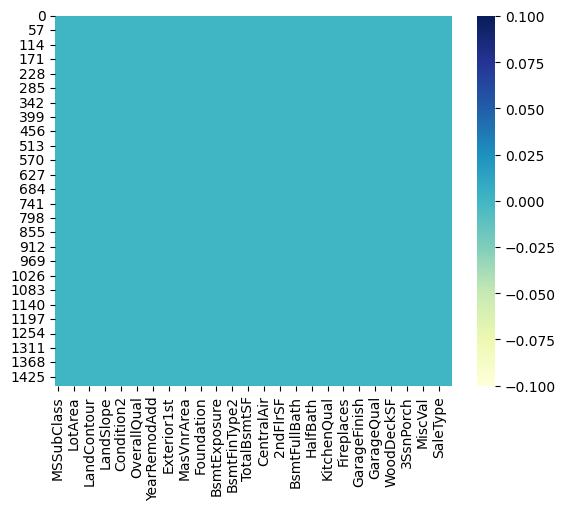

In [11]:
sns.heatmap(df_train.isnull(),cmap='YlGnBu')

In [12]:
ctg_cols = df_train.select_dtypes(object).columns

len(ctg_cols)

39

In [13]:
df_test = pd.read_csv('Clean_test.csv')

In [14]:
final_df =  pd.concat([df_train,df_test],axis=0)

In [15]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [16]:
final_df.shape

(2919, 76)

In [17]:

def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True).astype(int)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [18]:
final_df=category_onehot_multcols(ctg_cols)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [19]:
final_df.shape

(2919, 236)

In [20]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(2919, 176)

In [21]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [22]:
df_Train = final_df.iloc[:1422,:]
df_Test = final_df.iloc[1422:,:]

In [23]:
df_Train.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1417,60,70.049958,16545,8,5,1998,1998,731.0,781.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1418,20,71.000000,9204,5,5,1963,1963,0.0,25.0,872.0,...,0,0,0,0,0,0,0,0,1,0
1419,20,70.049958,16381,6,5,1969,1969,312.0,1110.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1420,60,90.000000,11700,6,6,1968,1968,420.0,404.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1421,120,53.000000,4043,6,5,1977,1977,0.0,360.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [24]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1422,120,37.000000,4435,6,5,2003,2003,170.0,686.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1423,80,70.049958,19690,6,7,1966,1966,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
1424,20,70.049958,9503,5,5,1958,1983,0.0,457.0,374.0,...,0,0,0,0,1,0,0,0,1,0
1425,20,80.000000,10721,6,6,1959,1959,243.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1426,60,81.000000,10944,7,5,1994,1994,448.0,1000.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [30]:
X_train = df_Train.drop(['SalePrice'],axis=1)
y_train = df_Train['SalePrice']

In [31]:
from xgboost import XGBRegressor
regressor=XGBRegressor()

In [32]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred=regressor.predict(df_Test.drop(['SalePrice'],axis=1))
y_pred

array([143129.94, 207830.23, 145414.39, ..., 175479.16, 107753.56,
       223027.2 ], dtype=float32)

In [35]:
pred = pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets['Id'] = datasets['Id'].astype(int)
datasets.to_csv('sample_submission.csv',index=False)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer